This NB examines the influence that the past bounces on the same price level has in the counterish trades. It also analyzes the influence of the number of days the price has been above/below the current entry S/R has on the outcome of a trade 
The trade types that I analyze are: `counter_b1`,`counter_b2`, `counter_b3` and `counter_b4`

# Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Input data

File with trades needs to be in .csv format

In [3]:
DF=pd.read_csv('counter_b1.csv',sep=',',na_values="n.a.")

Let's check the dimensions of our dataframe. The first value returned by `shape` is the number of records

In [4]:
DF.shape

(67, 10)

Let's get some info on the type of columns in the dataframe

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 10 columns):
Unnamed: 0          67 non-null int64
id                  67 non-null object
start               67 non-null object
strat               67 non-null object
entry               67 non-null float64
entry_time          67 non-null object
outcome             67 non-null object
lasttime            67 non-null object
bounces             67 non-null int64
bounces_lasttime    67 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 5.4+ KB


# Proportion of outcome

In [6]:
DF['outcome'].value_counts()

success    38
failure    29
Name: outcome, dtype: int64

# Transforming
We will transform the 2 outcome labels to digits

In [7]:
transl_dict={ 
        'S':1,
        'F':0,
        'success' : 1,
        'failure' : 0,
        True:1, 
        False:0
    }
def digit_binary(x,transl_dict,name):
    '''
    This function will replace the values in categorical
    binary variables by 1 and 0
    
    Parameters
    ----------
    transl_dict: dict
                 Keys will be the old categorical names and Values
                 will be 1 and 0. For example:
                 transl_dict={ 
                            'S':1,
                            'F':0, 
                            True:1, 
                            False:0
                            }
    name: str
          Name of the column to modify
        
    Returns
    -------
    The new label for the categorical variable
    '''

    return transl_dict[x[name]]

DF['outcome']=DF.apply(digit_binary,axis=1,transl_dict=transl_dict, name='outcome')

# last time
This datetime variable represents the last time the price was over/below the entry price level. The first to do is to create a new datetime variable representing the difference (in days) between the entry datetime (start column) and the last time datetime.¶

First thing we need to do is to convert the variables `start` and `lasttime` to Datetime class

In [8]:
DF['lasttime']= pd.to_datetime(DF['lasttime'])
DF['start'] = pd.to_datetime(DF['start'])

In [9]:
DF['diff_lasttime']=(DF['start']-DF['lasttime'])
DF['diff_lasttime']=DF['diff_lasttime'].apply(lambda x: x.days)

Now, let's examine the distribution of this newly created diff variable in the 2 outcome categories

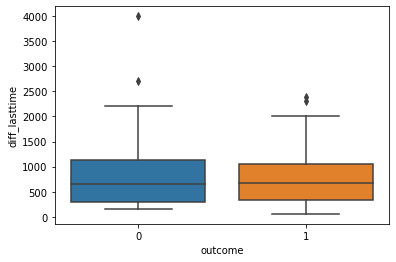

In [11]:
ax = sns.boxplot(x="outcome", y="diff_lasttime", data=DF)

* Mean for each category

In [12]:
DF.groupby("outcome").agg({'diff_lasttime': 'mean'})

,diff_lasttime
outcome,
0,957.793103
1,860.184211


* Median for each category

In [13]:
DF.groupby("outcome").agg({'diff_lasttime': 'median'})

,diff_lasttime
outcome,
0,659.0
1,671.5


* Binning data
Let's bin the data into a certain number of categories

In [14]:
max_v=max(DF['diff_lasttime'])

custom_bins_array = np.arange(0, max_v, 200)

DF['diff_cat']=pd.cut(DF['diff_lasttime'], np.around(custom_bins_array))

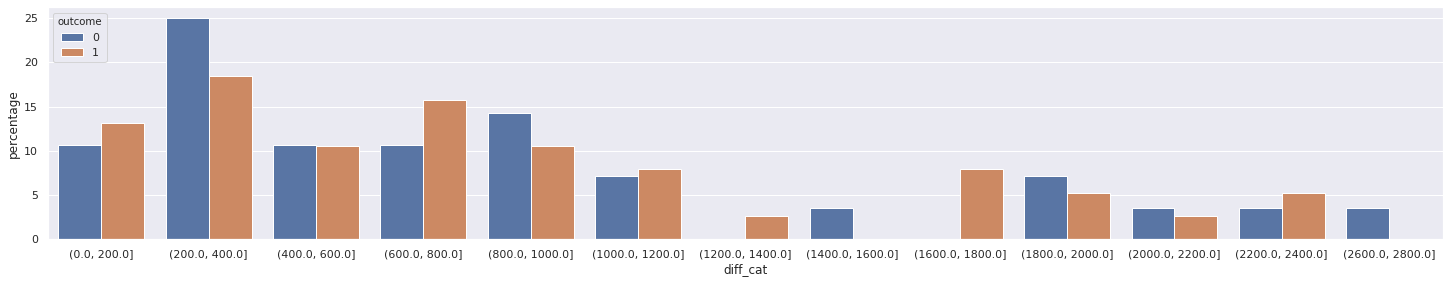

In [15]:
DF_counts = (DF.groupby(['outcome'])['diff_cat']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('diff_cat'))

sns.set(rc={'figure.figsize':(25,4.27)})

p = sns.barplot(x="diff_cat", y="percentage", hue='outcome', data=DF_counts)

# bounces
This quantitative discrete variable is used for representing the number of times the price has tested this level. Let's start comparing the distribution of this variable for the different categories of the outcome variable.

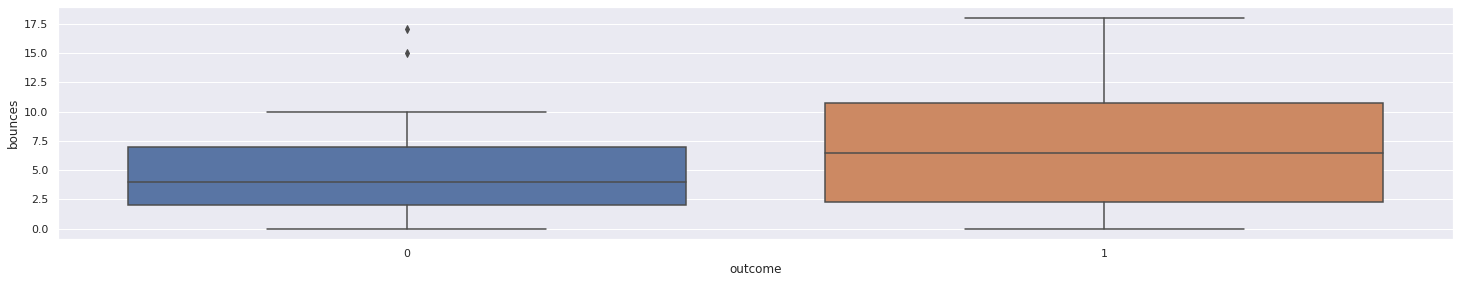

In [16]:
ax = sns.boxplot(x="outcome", y="bounces", data=DF)

* Mean for each category

In [17]:
DF.groupby("outcome").agg({'bounces': 'mean'})

,bounces
outcome,
0,5.103448
1,7.000000


* Median for each category

In [18]:
DF.groupby("outcome").agg({'bounces': 'median'})

,bounces
outcome,
0,4.0
1,6.5


* Binning data
Let's bin the data into a certain number of categories

In [19]:
max_v=max(DF['bounces'])

custom_bins_array = np.arange(0, max_v, 2)

DF['bounces peak_cat']=pd.cut(DF['bounces'], np.around(custom_bins_array))

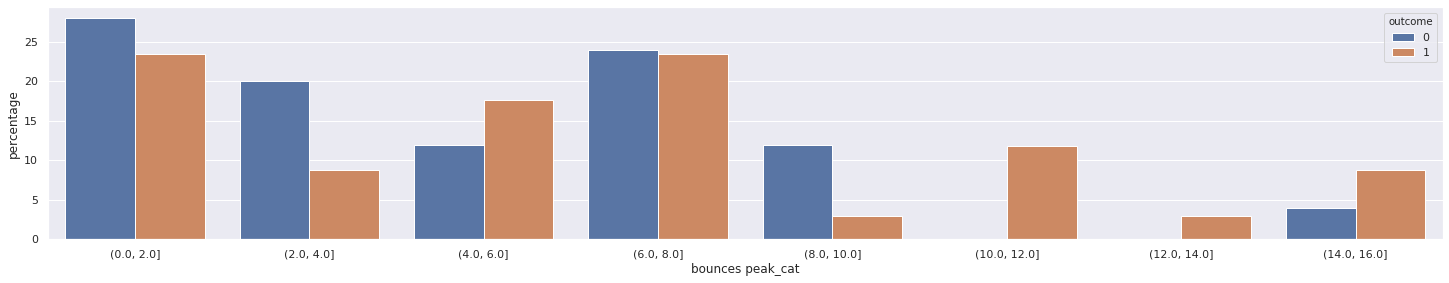

In [20]:
DF_counts = (DF.groupby(['outcome'])['bounces peak_cat']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('bounces peak_cat'))

sns.set(rc={'figure.figsize':(25,4.27)})

p = sns.barplot(x="bounces peak_cat", y="percentage", hue='outcome', data=DF_counts)

# bounces_lasttime
This quantitative discrete variable is used for representing the number of times the price has tested this level since last_time. Let's start comparing the distribution of this variable for the different categories of the outcome variable.¶

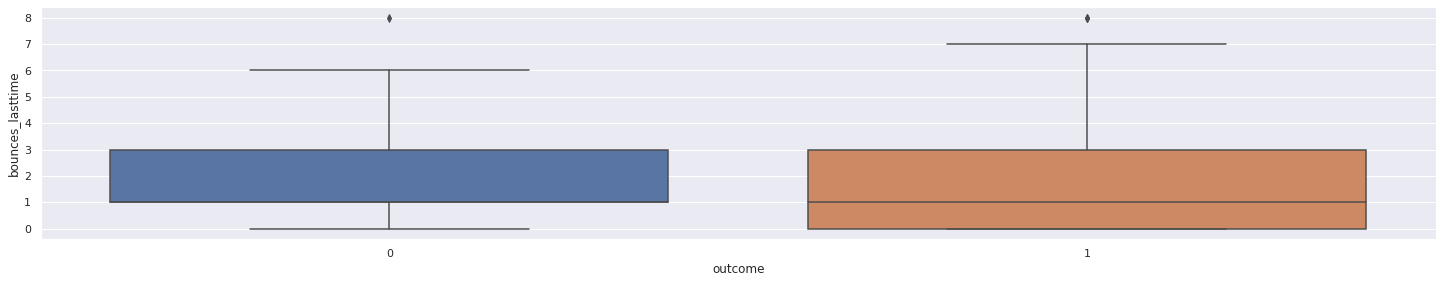

In [21]:
ax = sns.boxplot(x="outcome", y="bounces_lasttime", data=DF)

* Mean for each category

In [22]:
DF.groupby("outcome").agg({'bounces_lasttime': 'mean'})

,bounces_lasttime
outcome,
0,2.034483
1,2.184211


* Median for each category

In [23]:
DF.groupby("outcome").agg({'bounces_lasttime': 'median'})

,bounces_lasttime
outcome,
0,1
1,1


* Binning data
Let's bin the data into a certain number of categories. `np.arange(0,max_v,1)` where 1 controls the width of each bin

In [24]:
max_v=max(DF['bounces_lasttime'])

custom_bins_array = np.arange(0, max_v, 2)

DF['bounces peak_cat']=pd.cut(DF['bounces_lasttime'], np.around(custom_bins_array))

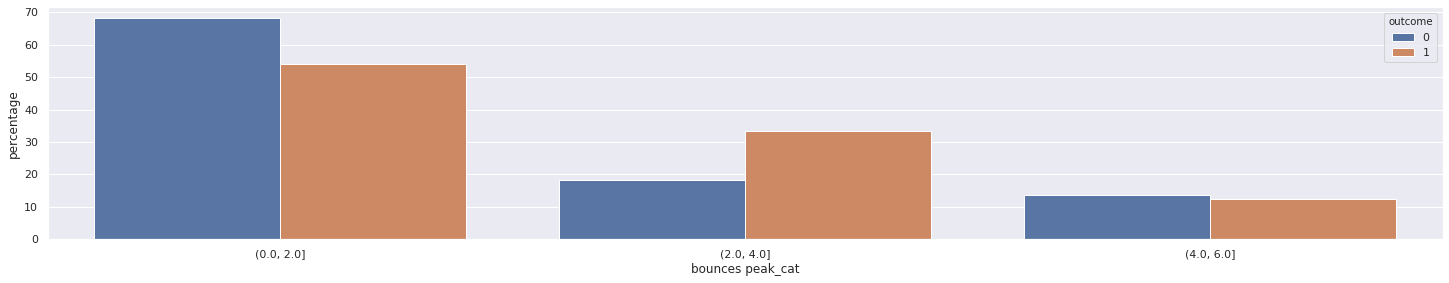

In [25]:
DF_counts = (DF.groupby(['outcome'])['bounces peak_cat']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('bounces peak_cat'))

sns.set(rc={'figure.figsize':(25,4.27)})

p = sns.barplot(x="bounces peak_cat", y="percentage", hue='outcome', data=DF_counts)

# Checking if the independent variables are correlated
For this, I am going to generate a scatter plot matrix

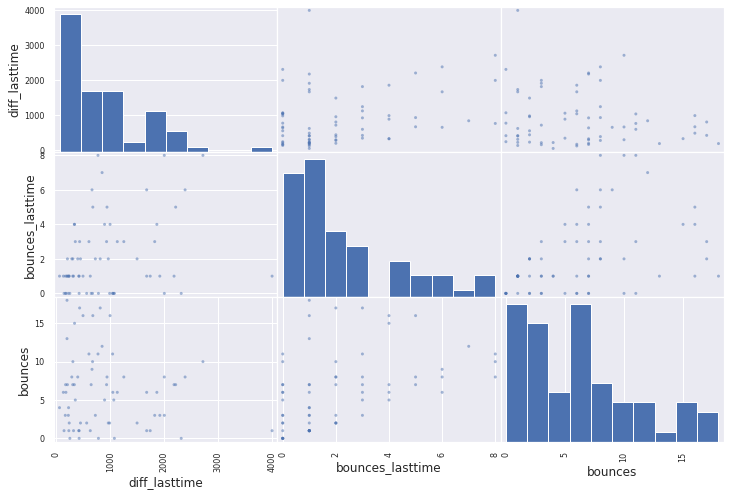

In [26]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["diff_lasttime", "bounces_lasttime","bounces"]
scatter_matrix(DF[attributes], figsize=(12, 8)) 
plt.savefig("scatter_matrix_plot.png")